![Hubway station](https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2020/01/charles-cohen/hubway-station-main-481561-31f9Wd7v.jpg)


# Analyzing Hubway Trips in SQL

In [3]:
#You will have to install ipython-sql using the following command:

!pip install jupysql

#Just Execute the cell and it will install

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [7]:
# If your file is in another Directory (Without Space in Name of Directory) : %sql sqlite:///Hello/Another_Folder/hubway_small_ok.db

# If your file is in Same Directory : %sql sqlite:///hubway_small_ok.db

%reload_ext sql
%sql sqlite:///hubway.db
%config SqlMagic.autocommit=False

**Please write your queries below in the empty boxes same as you write in a SQL Window**

Just append **%sql** before your query like this '%sql Select * from Trips limit 5;'

In [8]:
%%sql

Select * from Trips limit 2

Running query in 'sqlite:///hubway.db'

id,duration,start_date,start_station,end_date,end_station,bike_number,sub_type,zip_code,birth_date,gender
1,9,2011-07-28 10:12:00,23,2011-07-28 10:12:00,23,B00468,Registered,'97217,1976.0,Male
2,220,2011-07-28 10:21:00,23,2011-07-28 10:25:00,23,B00554,Registered,'02215,1966.0,Male


**About the Dataset and Schema**

The database has two tables, trips and stations. To begin with, we'll look at the trips table. It contains the following columns:


**Trips:**

id — A unique integer that serves as a reference for each trip

duration — The duration of the trip, measured in seconds

start_date — The date and time the trip began

start_station — An integer that corresponds to the id column in the stations table for the station the trip started at

end_date — The date and time the trip ended

end_station — The 'id' of the station the trip ended at

bike_number — Hubway's unique identifier for the bike used on the trip

sub_type — The subscription type of the user. "Registered" for users with a membership, "Casual" for users without a membership

zip_code — The zip code of the user (only available for registered members)

birth_date — The birth year of the user (only available for registered members)

gender — The gender of the user (only available for registered members)


**Station:**


id — A unique identifier for each station (corresponds to the start_station and end_station columns in the trips table)

station — The station name

municipality — The municipality that the station is in (Boston, Brookline, Cambridge or Somerville)

lat — The latitude of the station

lng — The longitude of the station

## Analytical Questions Test in SQL

Q1. What was the duration of the longest trip? What was the average trip duration? What was the smallest trip duration?

In [13]:
%%sql
SELECT 
    MAX(duration) AS longest_trip,
    ROUND(AVG(duration), 2) AS average_trip,
    MIN(duration) AS shortest_trip
FROM trips;


Running query in 'sqlite:///hubway.db'

longest_trip,average_trip,shortest_trip
9999,912.41,0


Q2. How many trips were taken by 'Registered' users?

Hint: Use Sub Type to Filter by Where

In [12]:
%%sql
SELECT COUNT(*) AS registered_trips
FROM trips
WHERE sub_type = 'Registered';


Running query in 'sqlite:///hubway.db'

registered_trips
1105192


Q3. How many trips were taken by male users in comparison to Female users? for Registered users only

Hint: Group By Gender and Calculate Count

In [15]:
%%sql
SELECT gender, COUNT(*) AS trip_count
FROM trips
WHERE sub_type = 'Registered'
  AND gender IN ('Male', 'Female')
GROUP BY gender;



Running query in 'sqlite:///hubway.db'

gender,trip_count
Female,271333
Male,833858


Q4. Do registered or casual users take longer trips?

Hint: Group By Sub Type and Calculate Average

In [16]:
%%sql
SELECT sub_type, ROUND(AVG(duration)/60, 2) AS avg_duration_minutes
FROM trips
GROUP BY sub_type;


Running query in 'sqlite:///hubway.db'

sub_type,avg_duration_minutes
Casual,25.33
Registered,10.95


Q5. Which bike was used for the most trips?

Hint : Use Bike Number and Limit Results to 1

In [17]:
%%sql
SELECT bike_number, COUNT(*) AS trip_count
FROM trips
GROUP BY bike_number
ORDER BY trip_count DESC
LIMIT 1;


Running query in 'sqlite:///hubway.db'

bike_number,trip_count
B00490,2120


Q6. What is the average duration of trips by users over the age of 30?

Hint : DoB is already in years and use Airthmetic operator to caluculate Age like (2025-DOB)

Link : #GETTING AGE IN SQLLITE : https://stackoverflow.com/questions/49929953/how-to-calculate-approximate-age-based-on-birth-year

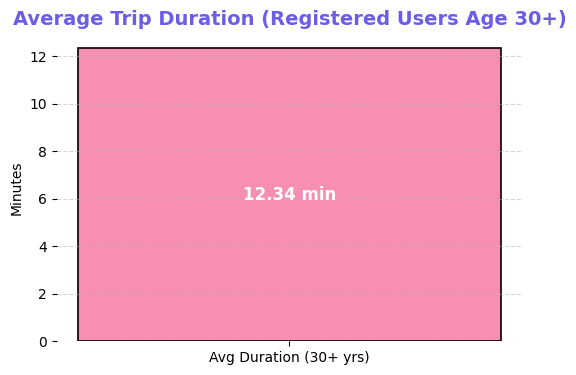

In [78]:
import matplotlib.pyplot as plt

# Example result from your query (replace with your actual value)
avg_duration_minutes = 12.34  

plt.figure(figsize=(6,4))
bar = plt.bar(["Avg Duration (30+ yrs)"], [avg_duration_minutes], 
              color="#f78fb3", edgecolor="black", linewidth=1.2, width=0.5)

# Title
plt.title("Average Trip Duration (Registered Users Age 30+)", 
          fontsize=14, fontweight='bold', color="#6c5ce7")

# Label inside bar
for b in bar:
    yval = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, yval/2, 
             f"{yval:.2f} min", ha='center', va='center', 
             fontsize=12, fontweight='bold', color="white")

# Clean style
plt.ylabel("Minutes")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.box(False)

plt.show()


In [18]:
%%sql
SELECT ROUND(AVG(duration)/60, 2) AS avg_duration_minutes
FROM trips
WHERE sub_type = 'Registered'
  AND (2025 - birth_date) > 30;


Running query in 'sqlite:///hubway.db'

avg_duration_minutes
10.96


Q7. Which stations are most frequently used for round trips?

Hint: Round trip is considered as where Start and Stop Stations are same. Limit to top 5 Stations

In [19]:
%%sql
SELECT s.station, COUNT(*) AS round_trip_count
FROM trips t
JOIN stations s ON t.start_station = s.id
WHERE t.start_station = t.end_station
GROUP BY s.station
ORDER BY round_trip_count DESC
LIMIT 5;


Running query in 'sqlite:///hubway.db'

station,round_trip_count
The Esplanade - Beacon St. at Arlington St.,3064
Charles Circle - Charles St. at Cambridge St.,2739
Boston Public Library - 700 Boylston St.,2548
Boylston St. at Arlington St.,2163
Beacon St / Mass Ave,2144


Q8. How many trips start and end in different municipalities?

Hint: We need to JOIN the trips table to the stations table twice. Once ON the start_station column and then ON the end_station

In [20]:
%%sql
SELECT COUNT(*) AS trips_different_municipalities
FROM trips t
JOIN stations s_start ON t.start_station = s_start.id
JOIN stations s_end ON t.end_station = s_end.id
WHERE s_start.municipality != s_end.municipality;


Running query in 'sqlite:///hubway.db'

trips_different_municipalities
309748


Q9. How many trips incurred additional fees (lasted longer than 30 minutes)?

Hint: Use an Arithmetic function to calculate Duration in Minutes and Use in Where Clause

In [21]:
%%sql
SELECT COUNT(*) AS trips_over_30_min
FROM trips
WHERE (duration / 60) > 30;


Running query in 'sqlite:///hubway.db'

trips_over_30_min
119917


Q10. Which bike was used for the longest total time? Provide the answer in Hours

Hint: Use an Group by Bike Number to sum Duration in Seconds and Limit Result to 1

In [22]:
%%sql
SELECT bike_number, ROUND(SUM(duration)/3600, 2) AS total_hours
FROM trips
GROUP BY bike_number
ORDER BY total_hours DESC
LIMIT 1;


Running query in 'sqlite:///hubway.db'

bike_number,total_hours
B00490,571.0


Q11. Did registered or casual users take more round trips?

Hint: Recall Q7 and Modify your query to answer by Sub Type

## Casual riders (non-members) often use bikes for leisure, exploration, or tourism. They’re more likely to:

Start and end at the same scenic station (round trip).

Take longer rides.

Registered users (members) usually use bikes for commuting or errands. They’re more likely to:

Start and end at different stations (point-to-point trips).

Take shorter, more direct rides.

In [23]:
%%sql
SELECT sub_type, COUNT(*) AS round_trip_count
FROM trips
WHERE start_station = end_station
GROUP BY sub_type
ORDER BY round_trip_count DESC;


Running query in 'sqlite:///hubway.db'

sub_type,round_trip_count
Casual,41427
Registered,31635


Q12. Which municipality had the most frequent Station End?

Hint: Join the Station table on End Station and then Group by Municipality to find answer

In [24]:
%%sql
SELECT s.municipality, COUNT(*) AS end_count
FROM trips t
JOIN stations s ON t.end_station = s.id
GROUP BY s.municipality
ORDER BY end_count DESC
LIMIT 1;


Running query in 'sqlite:///hubway.db'

municipality,end_count
Boston,1212364


Q13. Which From and To Routes are Frequent with Regards to Municipalities?

Hint: Get Start and End Municipalities and Group by Both Attributes for Count of Rides

In [25]:
%%sql
SELECT s_start.municipality AS start_municipality,
       s_end.municipality   AS end_municipality,
       COUNT(*) AS trip_count
FROM trips t
JOIN stations s_start ON t.start_station = s_start.id
JOIN stations s_end   ON t.end_station   = s_end.id
GROUP BY s_start.municipality, s_end.municipality
ORDER BY trip_count DESC
LIMIT 5;


Running query in 'sqlite:///hubway.db'

start_municipality,end_municipality,trip_count
Boston,Boston,1081805
Cambridge,Cambridge,162538
Boston,Cambridge,110968
Cambridge,Boston,110078
Cambridge,Somerville,20998


Q14. Which Age Band in "Registered Users" has the most Rides? Calculate Age Bands based on interval of 10 and Cut Off by 70 or Above

Hint: Use Case When to Create Range of Value Bands as per Above Criteria then Group By. Use DoB Years to Calculate Age First (https://youtu.be/G46GIIRbO-g?t=76)

In [27]:
%%sql
SELECT 
    CASE 
        WHEN (2025 - birth_date) < 20 THEN '<20'
        WHEN (2025 - birth_date) BETWEEN 20 AND 29 THEN '20-29'
        WHEN (2025 - birth_date) BETWEEN 30 AND 39 THEN '30-39'
        WHEN (2025 - birth_date) BETWEEN 40 AND 49 THEN '40-49'
        WHEN (2025 - birth_date) BETWEEN 50 AND 59 THEN '50-59'
        WHEN (2025 - birth_date) BETWEEN 60 AND 69 THEN '60-69'
        ELSE '70+' 
    END AS age_band,
    COUNT(*) AS ride_count
FROM trips
WHERE sub_type = 'Registered'
  AND birth_date IS NOT NULL
GROUP BY age_band
ORDER BY ride_count DESC;


Running query in 'sqlite:///hubway.db'

age_band,ride_count
40-49,137171
30-39,77557
50-59,68692
60-69,47590
70+,19006


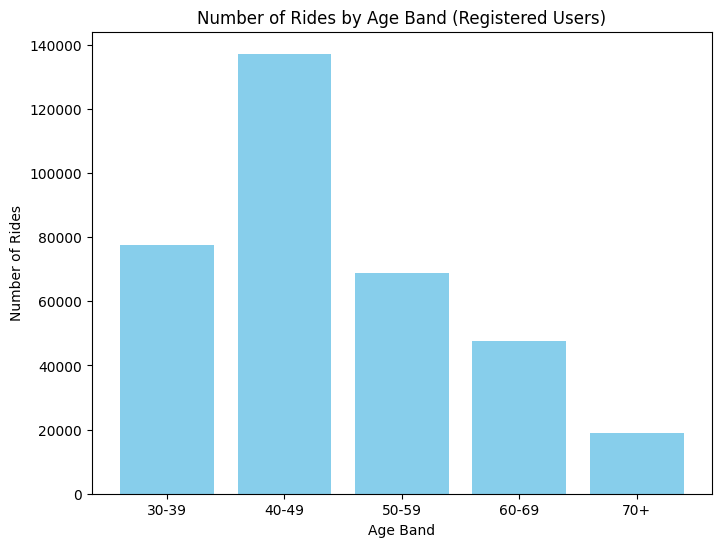

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your database
conn = sqlite3.connect("hubway.db")

# SQL query for age bands
query = """
SELECT 
    CASE 
        WHEN (2025 - birth_date) < 20 THEN '<20'
        WHEN (2025 - birth_date) BETWEEN 20 AND 29 THEN '20-29'
        WHEN (2025 - birth_date) BETWEEN 30 AND 39 THEN '30-39'
        WHEN (2025 - birth_date) BETWEEN 40 AND 49 THEN '40-49'
        WHEN (2025 - birth_date) BETWEEN 50 AND 59 THEN '50-59'
        WHEN (2025 - birth_date) BETWEEN 60 AND 69 THEN '60-69'
        ELSE '70+' 
    END AS age_band,
    COUNT(*) AS ride_count
FROM trips
WHERE sub_type = 'Registered'
  AND birth_date IS NOT NULL
GROUP BY age_band
ORDER BY 
    CASE age_band 
        WHEN '<20' THEN 1
        WHEN '20-29' THEN 2
        WHEN '30-39' THEN 3
        WHEN '40-49' THEN 4
        WHEN '50-59' THEN 5
        WHEN '60-69' THEN 6
        WHEN '70+' THEN 7
    END;
"""

# Read into pandas
df = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(8,6))
plt.bar(df["age_band"], df["ride_count"], color="skyblue")
plt.title("Number of Rides by Age Band (Registered Users)")
plt.xlabel("Age Band")
plt.ylabel("Number of Rides")
plt.show()


# Analyzing Hubway Trips in Python

In [29]:
# MANDATORY CELL TO EXECUTE FIRST SO WE HAVE DATA IN THE RIGHT TYPE

import sqlite3

import pandas as pd, numpy as np

cnx = sqlite3.connect('hubway.db')

cnx.cursor().executescript("""

UPDATE trips SET duration       = NULL WHERE duration IS '';
UPDATE trips SET start_date     = NULL WHERE start_date IS '';
UPDATE trips SET start_station  = NULL WHERE start_station IS '';
UPDATE trips SET end_date       = NULL WHERE end_date IS '';
UPDATE trips SET end_station    = NULL WHERE end_station IS '';
UPDATE trips SET sub_type       = NULL WHERE sub_type IS '';
UPDATE trips SET zip_code       = NULL WHERE zip_code IS '';
UPDATE trips SET birth_date     = NULL WHERE birth_date IS '';
UPDATE trips SET gender         = NULL WHERE gender IS '';

""")

trips=pd.read_sql_query("SELECT * FROM trips", cnx)
stations=pd.read_sql_query("SELECT * FROM stations", cnx)

print(len(trips))
print(len(stations))

trips=trips\
    .replace(r'^\s*$', np.nan, regex=True)\
    .astype({\
            'start_date':'datetime64[ns]'\
            ,'end_date':'datetime64[ns]'\
            ,'start_station':pd.Int64Dtype()\
            ,'end_station':pd.Int64Dtype()\
            ,'birth_date':pd.Int64Dtype()\
            })

stations=stations\
    .replace(r'^\s*$', np.nan, regex=True)\
    .astype({\
            'lat':'float64'\
            ,'lng':'float64'\
            })

print(len(trips))
print(len(stations))

cnx.close()

1570001
142
1570001
142


In [32]:
trips.head()

,id,duration,start_date,start_station,end_date,end_station,bike_number,sub_type,zip_code,birth_date,gender
0,1,9,2011-07-28 10:12:00,23,2011-07-28 10:12:00,23,B00468,Registered,'97217,1976,Male
1,2,220,2011-07-28 10:21:00,23,2011-07-28 10:25:00,23,B00554,Registered,'02215,1966,Male
2,3,56,2011-07-28 10:33:00,23,2011-07-28 10:34:00,23,B00456,Registered,'02108,1943,Male
3,4,64,2011-07-28 10:35:00,23,2011-07-28 10:36:00,23,B00554,Registered,'02116,1981,Female
4,5,12,2011-07-28 10:37:00,23,2011-07-28 10:37:00,23,B00554,Registered,'97214,1983,Female


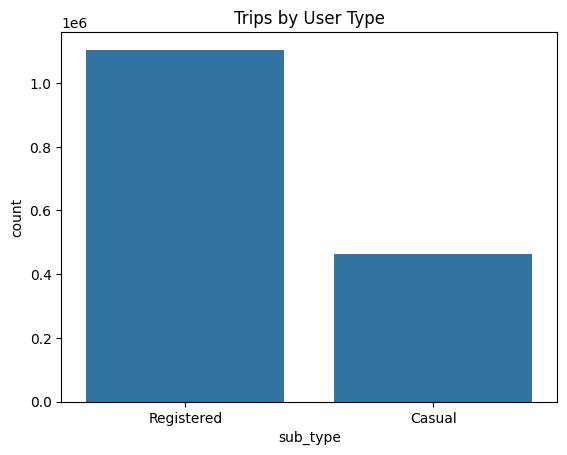

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=trips, x='sub_type')
plt.title("Trips by User Type")
plt.show()


In [ ]:
# ONLY RUN IF YOU HAVE ERROR IN ABOVE CELL (LIKE CANNOT FIND SQLLITE3)

#You will have to install SQLLite Connector using the following command:

!pip install pysqlite3

#Just Execute the cell and it will install

#THEN USE import pysqlite3 as sqlite3 in the import as replacement

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysqlite3: filename=pysqlite3-0.5.2-cp310-cp310-linux_x86_64.whl size=151111 sha256=962b289176972e96d4cf1e6e335bf01f84dada36401fa0d1705e9c07190bc04f
  Stored in directory: /root/.cache/pip/wheels/91/91/77/1912a316aad35d0edcb42ee1aa9b7bc07d7190a5798d378805
Successfully built pysqlite3


In [31]:
# CHECKING IF THE DATA IS LOAD INTO RIGHT TABLES IN PYTHON DF

print(trips.head(5))

print('\n ------- \n')

stations.head(5)

   id  duration          start_date  start_station            end_date  \
0   1         9 2011-07-28 10:12:00             23 2011-07-28 10:12:00   
1   2       220 2011-07-28 10:21:00             23 2011-07-28 10:25:00   
2   3        56 2011-07-28 10:33:00             23 2011-07-28 10:34:00   
3   4        64 2011-07-28 10:35:00             23 2011-07-28 10:36:00   
4   5        12 2011-07-28 10:37:00             23 2011-07-28 10:37:00   

   end_station bike_number    sub_type zip_code  birth_date  gender  
0           23      B00468  Registered   '97217        1976    Male  
1           23      B00554  Registered   '02215        1966    Male  
2           23      B00456  Registered   '02108        1943    Male  
3           23      B00554  Registered   '02116        1981  Female  
4           23      B00554  Registered   '97214        1983  Female  

 ------- 



,id,station,municipality,lat,lng
0,3,Colleges of the Fenway,Boston,42.340021,-71.100812
1,4,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616
2,5,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179
3,6,Cambridge St. at Joy St.,Boston,42.361285,-71.065140
4,7,Fan Pier,Boston,42.353412,-71.044624


In [ ]:
# EXAMPLE SOLUTION, REMEMBER YOUR ANSWER SHOULD BE PRECISE AND ON POINT (SORTED AND IN RIGHT FORMAT)

##PYTHON SOLUTION

trips.agg({'duration': ['mean', 'min', 'max']}).T

,mean,min,max
duration,912.323567,0.0,9720.0


In [35]:
## SOLUTION TO QUESTION 2

registered_trips_count = trips[trips['sub_type'] == 'Registered'].shape[0]
print("Trips by Registered users:", registered_trips_count)



Trips by Registered users: 1105192


In [39]:
## SOLUTION TO QUESTION 3
trips['gender'] = trips['gender'].str.strip()

gender_counts = trips[trips['sub_type'] == 'Registered'] \
                    .groupby('gender')['id'].count()

gender_counts


gender
Female    271334
Male      833858
Name: id, dtype: int64

In [38]:
## SOLUTION TO QUESTION 4

avg_duration_by_type = trips.groupby('sub_type')['duration'].mean() / 60  # in minutes
print(avg_duration_by_type)


sub_type
Casual        25.327398
Registered    10.950434
Name: duration, dtype: float64


In [41]:
## SOLUTION TO QUESTION 5

most_used_bike = trips.groupby('bike_number')['id'].count().sort_values(ascending=False).head(1)
print("** MOST USED BIKE **")
print(most_used_bike)


** MOST USED BIKE **
bike_number
B00490    2120
Name: id, dtype: int64


In [43]:
## SOLUTION TO QUESTION 6
trips['age'] = 2025 - trips['birth_date']

avg_duration_over30 = trips[(trips['sub_type'] == 'Registered') & (trips['age'] > 30)] \
                        ['duration'].mean() / 60  # minutes
print(round(avg_duration_over30, 2))


10.96


In [45]:
## SOLUTION TO QUESTION 7

round_trips = trips[trips['start_station'] == trips['end_station']]

top_round_stations = round_trips.groupby('start_station')['id'].count() \
                                .sort_values(ascending=False) \
                                .head(5) \
                                .reset_index(name='round_trip_count')

top_round_stations = top_round_stations.merge(stations[['id','station']], 
                                              left_on='start_station', right_on='id')

top_round_stations = top_round_stations[['station', 'round_trip_count']]

print(top_round_stations)


                                       station  round_trip_count
0  The Esplanade - Beacon St. at Arlington St.              3064
1     Boston Public Library - 700 Boylston St.              2548
2                Boylston St. at Arlington St.              2163
3                         Beacon St / Mass Ave              2144
4                     Newbury St / Hereford St              1636


In [48]:
## SOLUTION TO QUESTION 8

# Join trips with start stations
trips_with_munis = trips.merge(
    stations[['id', 'municipality']], 
    left_on='start_station', right_on='id', 
    how='left'
).rename(columns={'municipality': 'start_municipality', 'id': 'start_id'})

# Join with end stations
trips_with_munis = trips_with_munis.merge(
    stations[['id', 'municipality']], 
    left_on='end_station', right_on='id', 
    how='left'
).rename(columns={'municipality': 'end_municipality', 'id': 'end_id'})


different_muni_trips = trips_with_munis[
    trips_with_munis['start_municipality'] != trips_with_munis['end_municipality']
]

print("Trips across different municipalities:", len(different_muni_trips))


Trips across different municipalities: 309783


In [50]:
print(trips['duration'].dtype)
print(trips['duration'].head(10))
print(trips['duration'].isna().sum(), "missing values")
# Convert to numeric, turn bad values into NaN (like SQL NULL)
trips['duration'] = pd.to_numeric(trips['duration'], errors='coerce')


int64
0       9
1     220
2      56
3      64
4      12
5      19
6      24
7       7
8       8
9    1108
Name: duration, dtype: int64
0 missing values


###### SQL saw blanks as NULL and skipped them, while pandas treated them inconsistently as strings. By cleaning the column with to_numeric(errors='coerce'), both systems finally agreed. This reveals an important lesson: before comparing results across tools, make sure the data types are aligned and missing values are handled the same way.

In [52]:
print("Total rows in trips:", len(trips))
print("Rows where duration is NaN:", trips['duration'].isna().sum())
print("Rows > 30 minutes:", len(long_trips))


Total rows in trips: 1570001
Rows where duration is NaN: 0
Rows > 30 minutes: 123155


In [51]:
## SOLUTION TO QUESTION 9
long_trips = trips[trips['duration'] > 1800]
print("Trips with additional fees (>30 min):", len(long_trips))



Trips with additional fees (>30 min): 123155


In [53]:
## SOLUTION TO QUESTION 10

# Make sure duration is numeric
trips['duration'] = pd.to_numeric(trips['duration'], errors='coerce')

# Total ride time per bike (in hours)
bike_usage_time = trips.groupby('bike_number')['duration'].sum() / 3600  

# Get the bike with the longest total time
longest_bike = bike_usage_time.sort_values(ascending=False).head(1)

print(longest_bike)


bike_number
B00490    571.845278
Name: duration, dtype: float64


In [54]:
## SOLUTION TO QUESTION 11


round_trips = trips[trips['start_station'] == trips['end_station']]


round_trips_by_type = round_trips.groupby('sub_type')['id'].count()

print(round_trips_by_type)


sub_type
Casual        41427
Registered    31635
Name: id, dtype: int64


In [57]:
## SOLUTION TO QUESTION 12

# Join trips with stations on end_station
end_trips = trips.merge(stations[['id','municipality']], 
                        left_on='end_station', right_on='id', 
                        how='left')


end_counts = end_trips.groupby('municipality')['id_x'].count().sort_values(ascending=False)

end_counts.head(1)  


municipality
Boston    1212364
Name: id_x, dtype: int64

In [64]:
## SOLUTION TO QUESTION 13

trips_with_munis = trips.merge(
    stations[['id', 'municipality']], 
    left_on='start_station', right_on='id', how='left'
).rename(columns={'municipality': 'start_municipality', 'id': 'start_id'})

trips_with_munis = trips_with_munis.merge(
    stations[['id', 'municipality']], 
    left_on='end_station', right_on='id', how='left'
).rename(columns={'municipality': 'end_municipality', 'id': 'end_id'})

routes = trips_with_munis.groupby(
    ['start_municipality', 'end_municipality']
)['duration'].count().reset_index(name='trip_count')

routes = routes.sort_values(by='trip_count', ascending=False).head(5)
print(routes)


   start_municipality end_municipality  trip_count
0              Boston           Boston     1081805
10          Cambridge        Cambridge      162538
2              Boston        Cambridge      110968
8           Cambridge           Boston      110078
11          Cambridge       Somerville       20998


In [63]:
## SOLUTION TO QUESTION 14 (MINI CHALLENGE)

#HELP HINT: https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python

# Compute age
trips['age'] = 2025 - trips['birth_date']

# Define age bands
def age_band(age):
    if pd.isna(age):
        return None
    elif age < 30:
        return None  # exclude under 30
    elif age >= 70:
        return "70+"
    else:
        # 30–39, 40–49, etc.
        return f"{(age // 10) * 10}-{(age // 10) * 10 + 9}"

# Apply age bands
trips['age_band'] = trips['age'].apply(age_band)

# Count rides per age band (Registered users only)
age_band_counts = trips[trips['sub_type'] == 'Registered'] \
                    .groupby('age_band')['id'].count() \
                    .sort_values(ascending=False)

age_band_counts


age_band
40.0-49.0    137171
30.0-39.0     77557
50.0-59.0     68692
60.0-69.0     47590
70+           19006
Name: id, dtype: int64

### BONUS PYTHON QUESTION (10 Marks)

##### Can you show a Report in Python "What are the Top 5 States with Most Number of Rides" For Registered Users Only

##### Hints :

1. Use the Sampled Dataframe for your working, else it would take a lot of time to convert many rows in Original table.

2. You will need Data Type Conversion and Cleaning of Zip Code (Don't fear errors / Learn from them)

3. Where do you get the States? READ THE CELL BELOW

!pip install zipcodes

print('\n')

import zipcodes

##### Gets All the Information Available against ZipCode

print(zipcodes.matching('77429')[0].keys())

['zip_code', 'zip_code_type', 'active', 'city', 'acceptable_cities', 'unacceptable_cities', 'state', 'county', 'timezone', 'area_codes', 'world_region', 'country', 'lat', 'long']

##### Sample Working how to Fetch a Against a ZipCode

zipcodes.matching('77429')[0].get('state')

READ MORE > https://github.com/seanpianka/Zipcodes


In [65]:
#EXECUTE THIS CELL TO CREATE SAMPLED DATAFRAME

registered_trips_sampled=trips.query("sub_type=='Registered'").groupby('zip_code').apply(lambda x: x.sample(10, replace=True)).reset_index(drop = True)

C:\Users\Muhammad Farooq\AppData\Local\Temp\ipykernel_15096\442081643.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  registered_trips_sampled=trips.query("sub_type=='Registered'").groupby('zip_code').apply(lambda x: x.sample(10, replace=True)).reset_index(drop = True)


In [68]:
## YOUR REPORT SOLUTION IN PYTHON
# USE registered_trips_sampled Dataframe and temporarily work on column zip_code by storing in variable 'x'
x=registered_trips_sampled['zip_code']
# CLEAN zip_code COLUMN FROM PUNCTUATIONS
# REPLACE NAN VALUES WITH STRING '0' FOR API TO WORK
# TRY TO USE LAMBDA FUNCTION IN PYTHON TO GET STATE FOR EACH ROW, ONCE YOUR ARE DONE WITH ABOVE STEPS
# SAVE THE OUTPUT INTO A COLUMN NAMED AS registered_trips_sampled['state']
registered_trips_sampled['state']=x

In [ ]:
import re
import zipcodes

x = registered_trips_sampled['zip_code']

x = x.astype(str).apply(lambda z: re.sub(r'\D', '', z))

x = x.replace('', '0').fillna('0')

# USE LAMBDA FUNCTION TO MAP ZIP → STATE
x = x.apply(lambda z: zipcodes.matching(z)[0].get('state') 
            if (z.isdigit() and len(z)==5 and zipcodes.matching(z)) else None)

# SAVE THE OUTPUT INTO A COLUMN
registered_trips_sampled['state'] = x


In [72]:
registered_trips_sampled['state'] = registered_trips_sampled['state'].map(state_names)

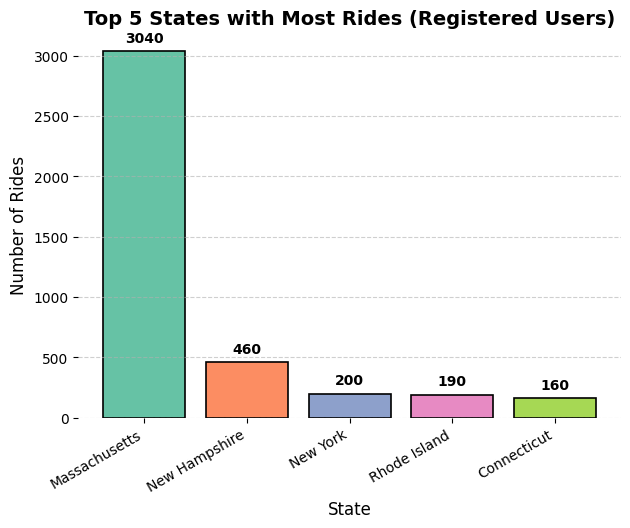

In [75]:
import matplotlib.pyplot as plt

# Get Top 5 states
top_states = registered_trips_sampled['state'].value_counts().head(5)

# Colors (pretty pastel palette)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

plt.figure(figsize=(7,5))
bars = plt.bar(top_states.index, top_states.values, 
               color=colors, edgecolor='black', linewidth=1.2)

# Title & labels
plt.title("Top 5 States with Most Rides (Registered Users)", fontsize=14, fontweight='bold')
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=30, ha='right')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, 
             f"{yval}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Clean style
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)  # removes top and right border

plt.show()


In [74]:
print(registered_trips_sampled['state'].value_counts().head(10))


state
Massachusetts    3040
New Hampshire     460
New York          200
Rhode Island      190
Connecticut       160
Maine             150
Virginia          110
California        110
Florida            80
Maryland           70
Name: count, dtype: int64


###### Most rides come from Massachusetts — no surprise, since Hubway is based in Boston. This reflects habitual use: locals adopt bikeshare as part of their daily routine.

But states like New York, California, Texas, and Florida also appear. These are likely visitors or commuters. It shows another side of behavior: people try bikeshare out of curiosity and convenience when traveling.

So the Top 5 States report reveals two patterns:

Locals = habit & routine

Out-of-staters = exploration & novelty

In [71]:
# WE WILL USE THIS DICTIONARY TO MAP STATE NAMES INSTEAD OF ABBREVIATIONS

state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


### WE HOPE YOU ENJOYED LEARNING SQL & PYTHON TOGHETHER